In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from image_processing import read_images, resize_images, convert_rgb, test_image
import matplotlib.pyplot as plt
import cv2
import os
import glob
from PIL import Image, ImageDraw, ImageFont
import random

%matplotlib inline

Using TensorFlow backend.


In [2]:
# model = load_model('models/model_faces.h5')

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0826 17:38:16.138619 4392322496 deprecation_wrapper.py:119] From //anaconda3/envs/kera/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 17:38:16.153050 4392322496 deprecation_wrapper.py:119] From //anaconda3/envs/kera/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 17:38:16.155216 4392322496 deprecation_wrapper.py:119] From //anaconda3/envs/kera/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 17:38:16.185955 4392322496 deprecation_wrapper.py:119] From //anaconda3/envs/kera/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

In [4]:
model.load_weights('models/third_faces_try.h5')

In [6]:
angry = read_images('data/angry/*.*')
contempt = read_images('data/contempt/*.*')
fear = read_images('data/fear/*.*')
happy = read_images('data/happy/*.*')
neutral = read_images('data/neutral/*.*')
sad = read_images('data/sad/*.*')
surprise = read_images('data/surprise/*.*')

In [7]:
angry = convert_rgb(angry)
contempt = convert_rgb(contempt)
fear = convert_rgb(fear)
happy = convert_rgb(happy)
neutral = convert_rgb(neutral)
sad = convert_rgb(sad)
surprise = convert_rgb(surprise)

In [8]:
angry = resize_images(angry)
contempt = resize_images(contempt)
fear = resize_images(fear)
happy = resize_images(happy)
neutral = resize_images(neutral)
sad = resize_images(sad)
surprise = resize_images(surprise)

In [9]:
emotions = [angry, contempt, fear, happy, neutral, sad, surprise]

In [10]:
for i, emotion in enumerate(emotions):
    print(f'{i} length is {len(emotion)}')

0 length is 185
1 length is 264
2 length is 192
3 length is 250
4 length is 188
5 length is 204
6 length is 208


In [9]:
# 0 length is 267
# 1 length is 308
# 2 length is 299
# 3 length is 355
# 4 length is 244
# 5 length is 358
# 6 length is 266

In [11]:
y = len(angry) * [0] + len(contempt) * [1] + len(fear) * [2] + len(happy) * [3] + len(neutral) * [4] + len(sad) * [5] + len(surprise) * [6]

In [12]:
y = to_categorical(y)

In [13]:
X = angry + contempt + fear + happy + neutral + sad + surprise

In [14]:
X = np.asarray(X)

In [15]:
print(X.shape, y.shape)

(1491, 50, 50, 3) (1491, 7)


In [16]:
X = X.astype('float32')

In [17]:
X /= 255

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')     

In [20]:
train_generator = train_datagen.flow(X_train, y_train,
        batch_size=32)

In [21]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    validation_steps=10)

W0826 17:39:00.875346 4392322496 deprecation.py:323] From //anaconda3/envs/kera/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50


//anaconda3/envs/kera/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
//anaconda3/envs/kera/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 16s 161ms/step - loss: 2.1093 - acc: 0.2966 - val_loss: 1.9183 - val_acc: 0.3000
Epoch 2/50
100/100 [==============================] - 15s 150ms/step - loss: 1.6128 - acc: 0.3749 - val_loss: 2.0352 - val_acc: 0.2733
Epoch 3/50
100/100 [==============================] - 15s 148ms/step - loss: 1.5252 - acc: 0.4142 - val_loss: 1.8876 - val_acc: 0.3333
Epoch 4/50
100/100 [==============================] - 15s 146ms/step - loss: 1.4891 - acc: 0.4268 - val_loss: 2.0582 - val_acc: 0.3733
Epoch 5/50
100/100 [==============================] - 15s 145ms/step - loss: 1.4671 - acc: 0.4353 - val_loss: 1.8875 - val_acc: 0.3800
Epoch 6/50
100/100 [==============================] - 15s 145ms/step - loss: 1.4497 - acc: 0.4373 - val_loss: 1.9102 - val_acc: 0.3800
Epoch 7/50
100/100 [==============================] - 15s 154ms/step - loss: 1.4329 - acc: 0.4552 - val_loss: 1.9342 - val_acc: 0.3800
Epoch 8/50
100/100 [==============================] - 15s 152ms/st

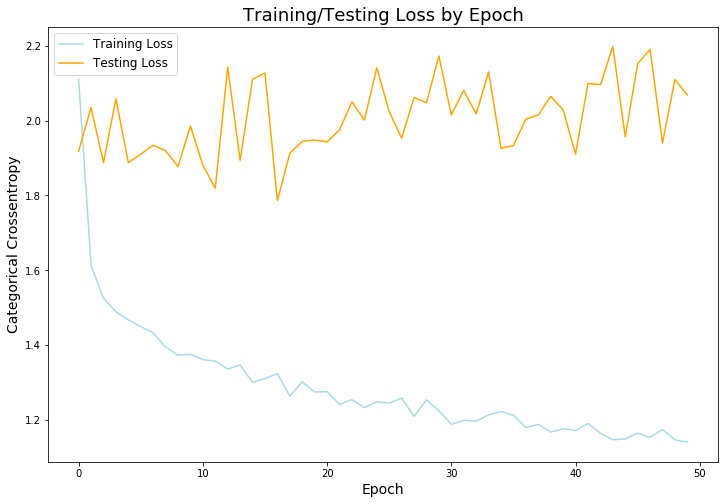

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss', color='lightblue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training/Testing Loss by Epoch', fontsize = 18)
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Categorical Crossentropy', fontsize = 14)
plt.legend(fontsize = 12);

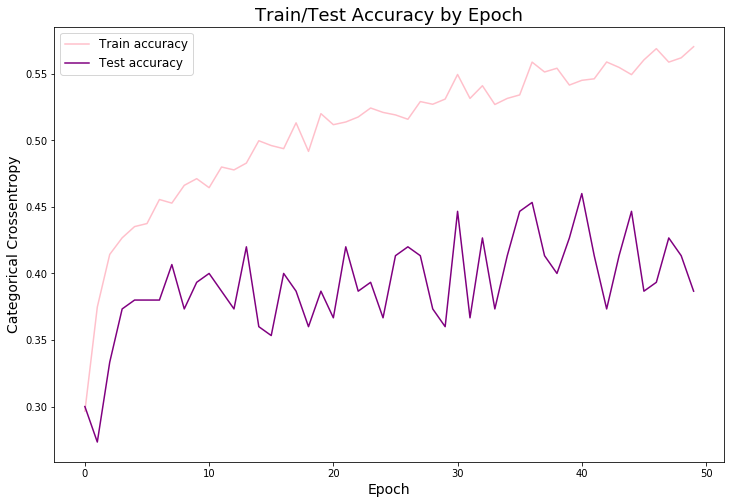

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['acc'], label='Train accuracy', color='pink')
plt.plot(history.history['val_acc'], label='Test accuracy', color='purple')
plt.title('Train/Test Accuracy by Epoch', fontsize = 18)
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Categorical Crossentropy', fontsize = 14)
plt.legend(fontsize = 12);

In [106]:
model.save_weights('models/third_faces_try.h5')

In [107]:
model.save('models/model_faces.h5')

In [24]:
preds = model.predict_classes(X_test)
test_ys = np.argmax(y_test, axis=1)

In [25]:
class_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
pred_names = []
actual_names = []

In [26]:
for v in class_labels.values():
    pred_names.append('Predicted: ' + v)
    actual_names.append('Actual: ' + v)

In [126]:
pd.DataFrame(confusion_matrix(test_ys, preds), columns= pred_names, index=actual_names)

,Predicted: angry,Predicted: disgust,Predicted: fear,Predicted: happy,Predicted: neutral,Predicted: sad,Predicted: surprise
Actual: angry,2,5,5,6,1,0,0
Actual: disgust,0,15,5,4,8,1,0
Actual: fear,0,2,11,3,1,0,0
Actual: happy,0,0,1,12,9,0,0
Actual: neutral,0,3,0,0,15,0,0
Actual: sad,0,0,1,1,1,16,2
Actual: surprise,0,0,0,1,0,6,13


In [130]:
print(classification_report(test_ys, preds, target_names=class_labels.values()))

              precision    recall  f1-score   support

       angry       1.00      0.11      0.19        19
     disgust       0.60      0.45      0.52        33
        fear       0.48      0.65      0.55        17
       happy       0.44      0.55      0.49        22
     neutral       0.43      0.83      0.57        18
         sad       0.70      0.76      0.73        21
    surprise       0.87      0.65      0.74        20

    accuracy                           0.56       150
   macro avg       0.64      0.57      0.54       150
weighted avg       0.64      0.56      0.54       150



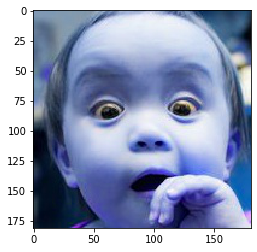

In [60]:
rand_img = cv2.imread('data/surprise/0250.jpeg')

plt.imshow(rand_img);

In [61]:
rand_img.shape

(181, 181, 3)

In [62]:
rand_img = cv2.resize(rand_img.copy(), (50,50), 3)
rand_img = rand_img.astype('float32') / 255.0
rand_img = rand_img.reshape(-1, 50, 50, 3)
prediction = model.predict_classes(rand_img)
label = class_labels[prediction[0]]

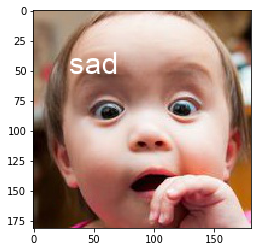

In [63]:
test_img = Image.open('data/surprise/0250.jpeg')
font = ImageFont.truetype('Arial.ttf', size=25)
draw = ImageDraw.Draw(test_img).text((30,30), label, (255,255,255), font=font)
plt.imshow(test_img);

In [33]:
def test_image(path):
    print('Reading the image')
    rand_img = cv2.imread(path)
    print('Resizing the image and making predictions')
    rand_img = cv2.resize(rand_img.copy(), (50,50), 3)
    rand_img = rand_img.astype('float32') / 255.0
    rand_img = rand_img.reshape(-1, 50, 50, 3)
    prediction = model.predict_classes(rand_img)
    label = class_labels[prediction[0]]
    print('Drawing the label')
    test_img = Image.open(path)
    font = ImageFont.truetype('Arial.ttf', size=25)
    draw = ImageDraw.Draw(test_img).text((30,30), label, (0,0,0), font=font)
    print('Here\'s what model predicted:')
    plt.imshow(test_img);

In [68]:
del rand_img

NameError: name 'rand_img' is not defined

Reading the image
Resizing the image and making predictions
Drawing the label
Here's what model predicted:


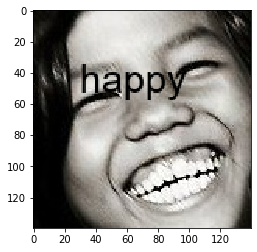

In [71]:
test_image('data/happy/0244.jpeg')